In [5]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import os

from matplotlib.pyplot import cm
line_color = [plt.colormaps["gnuplot"](float(i)/float(20)) for i in range(20)]

seq_dim = (6,6)
num_batches=120
magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)

In [2]:

work_dir = "./"
seq = np.load(os.path.join(work_dir, "seq_val_step0.npy"))
for ii in range(num_batches):
    if ii == 0:
        print(seq.shape)
        continue
    print(f"../epoch101_sample{ii+1}/")
    _seq = np.load(os.path.join(f"../epoch101_sample{ii+1}/", "seq_val_step0.npy"))
    seq = np.concatenate([seq, _seq], axis=0)
    print(seq.shape)
print(seq.shape)


(32768, 6, 6)
../epoch101_sample2/
(65536, 6, 6)
../epoch101_sample3/
(98304, 6, 6)
../epoch101_sample4/
(131072, 6, 6)
../epoch101_sample5/
(163840, 6, 6)
../epoch101_sample6/
(196608, 6, 6)
../epoch101_sample7/
(229376, 6, 6)
../epoch101_sample8/
(262144, 6, 6)
../epoch101_sample9/
(294912, 6, 6)
../epoch101_sample10/
(327680, 6, 6)
../epoch101_sample11/
(360448, 6, 6)
../epoch101_sample12/
(393216, 6, 6)
../epoch101_sample13/
(425984, 6, 6)
../epoch101_sample14/
(458752, 6, 6)
../epoch101_sample15/
(491520, 6, 6)
../epoch101_sample16/
(524288, 6, 6)
../epoch101_sample17/
(557056, 6, 6)
../epoch101_sample18/
(589824, 6, 6)
../epoch101_sample19/
(622592, 6, 6)
../epoch101_sample20/
(655360, 6, 6)
../epoch101_sample21/
(688128, 6, 6)
../epoch101_sample22/
(720896, 6, 6)
../epoch101_sample23/
(753664, 6, 6)
../epoch101_sample24/
(786432, 6, 6)
../epoch101_sample25/
(819200, 6, 6)
../epoch101_sample26/
(851968, 6, 6)
../epoch101_sample27/
(884736, 6, 6)
../epoch101_sample28/
(917504, 6, 

([], [])

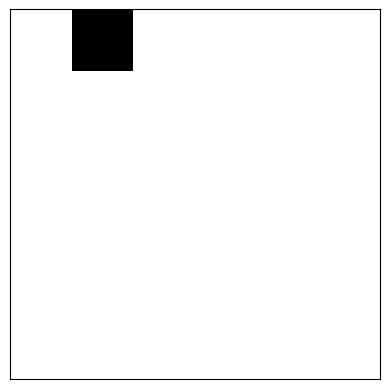

In [3]:
seq = seq.reshape(-1,*seq_dim)

seq[np.where(seq==0)] = -1

plt.imshow(seq[0], cmap='Greys', vmin=-1, vmax=1)
plt.xticks([])
plt.yticks([])

(3932160, 6, 6)
(491520, 36)
(491520, 36)
(491520, 36)
(491520, 36)
(491520, 36)
(491520, 36)
(491520, 36)
(491520, 36)
[0.00336668 0.00427104 0.00896899 0.00701779 0.00920064 0.01437506
 0.01020322 0.01340993 0.01149347 0.01412171 0.00742964 0.01114498
 0.01526841 0.01503818 0.02076635 0.01335185 0.01718392 0.01458625
 0.01273538 0.01139399 0.02402739 0.0215618  0.02095606 0.01434323
 0.0201068  0.01801094 0.00883279 0.01881518 0.01147086 0.01956491
 0.01592606 0.00901895 0.00896721 0.00659154 0.00754949 0.00595106
 0.00751193]


RuntimeError: 

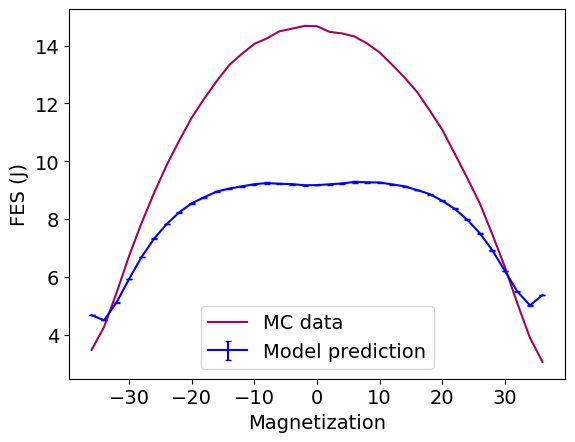

In [10]:
B = seq.shape[0]
print(seq.shape)
free_energys_list_ = []

for ii in range(8):
    seq_ = seq.reshape(-1,np.prod(seq_dim))[ii::8]
    print(seq_.shape)
    data_ = np.sum(seq_, axis=-1)
    counter_ = Counter(data_)

    hist_ = np.array([counter_[m] for m in magn[:]])
    P_ = hist_/np.sum(hist_)
    free_energies_ = -np.log(P_)*2
    free_energys_list_.append(free_energies_)

free_energys_list_ = np.array(free_energys_list_)
std_free = np.std(free_energys_list_, axis=0)
standard_error = std_free / np.sqrt(8)
t_critical = 1.96
margin_of_error = t_critical * standard_error
print(margin_of_error)
free_energies = np.mean(free_energys_list_, axis=0)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

# for ii in range(4):
#     plt.plot(magn[:], free_energys_list_[ii]-free_energys_list_[ii][8])
plt.errorbar(magn[:], free_energies, yerr=margin_of_error, label="Model prediction", capsize=2, c=line_color[0])
# plt.fill_between(magn, free_energies-free_energies[8]-std_free, free_energies-free_energies[8]+std_free, alpha=0.5, color="blue")
fes_ref = np.loadtxt("../../../../../data/ising-latt6x6-T4.0/latt6x6/FES2.00.dat").T

plt.plot(fes_ref[0], fes_ref[1], label="MC data", c=line_color[1])
plt.legend(fontsize=14)
plt.ylabel("FES (J)", fontdict={"size":14})
plt.xlabel("Magnetization", fontdict={"size":14})
plt.tick_params(axis='both', which='major', labelsize=14)

with open("FES-magn.dat", "w") as fp:
    fp.write("magn F errF\n")
    for i in range(len(magn)):
        fp.write("%f  %f    %f\n"%(magn[i], free_energies[i], margin_of_error[i]))

with open("FES-magn-MC.dat", "w") as fp:
    fp.write("magn F errF\n")
    for i in range(len(magn)):
        fp.write("%f  %f\n"%(fes_ref[0][i], fes_ref[1][i]))

raise RuntimeError

In [ ]:
logits = np.load(os.path.join(work_dir, "logits_val_step0.npy"))
for ii in range(num_batches):
    if ii == 0:
        print(logits.shape)
        continue
    _logits = np.load(os.path.join(f"../epoch101_sample{ii+1}/", "logits_val_step0.npy"))
    logits = np.concatenate([logits, _logits], axis=0)
    print(ii+1)
    print(logits.shape)


print(logits.shape)
# logits = np.transpose(logits, (0,2,3,1))
# print(logits.shape)

In [ ]:
import glob
f_logits_t = sorted(glob.glob(os.path.join(work_dir, "logits_val_step0_inttime*")))


time = [float(x.replace(os.path.join(work_dir, "logits_val_step0_inttime"), "").replace(".npy","")) for x in f_logits_t]
logits_t = [np.load(f) for f in f_logits_t]

for ii in range(num_batches):
    if ii == 0:
        print(len(logits_t), [logits_t[i].shape for i in range(len(logits_t))])
        continue
    _f_logits_t = sorted(glob.glob(os.path.join(f"../epoch101_sample{ii+1}/", "logits_val_step0_inttime*")))
    _logits_t = []
    for f in _f_logits_t[:-1]:
        _logits_t.append(np.load(f))
    try:
        _logits_t.append(np.load(_f_logits_t[-1]))
    except:
        f = os.path.join(f"../epoch101_sample{ii+1}/", "logits_val_step0.npy")
        _logits_t.append(np.load(f))
    print(ii+1,len(_logits_t), [_logits_t[i].shape for i in range(len(_logits_t))])
    logits_t = [np.concatenate([logits_t[i], _logits_t[i]], axis=0) for i in range(len(_f_logits_t))]

print(time)

In [ ]:

print([logits_t[i].shape for i in range(len(logits_t))])
# logits_t = [np.transpose(logits_t[i], (0,2,3,1)) for i in range(len(logits_t))]
# print([logits_t[i].shape for i in range(len(logits_t))])

In [ ]:

logits_t0 = logits_t[0]
print(logits_t0.shape)
'''
for ii in range(4,24):
    _f_logits_t = os.path.join(f"../epoch101_sample{ii+1}/", "logits_val_step0_inttime1.0.npy")
    _logits_t = np.load(_f_logits_t)
    print(_logits_t.shape)
    logits_t0 = np.concatenate([logits_t0, _logits_t], axis=0)

print(logits_t0.shape)
'''

In [ ]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(30, 12))

for ii in np.arange(0,len(f_logits_t),2):
    ii_y = ii//2%5
    ii_x = ii//2//5
    print(ii, ii_x, ii_y)
    axes[ii_x][ii_y].hist2d(logits_t[ii][:,:,:,0].reshape(-1), logits_t[ii][:,:,:,1].reshape(-1))
    axes[ii_x][ii_y].set_title("Time="+str(ii), fontdict={"size":32})
    axes[ii_x][ii_y].tick_params(axis='both', which='major', labelsize=32)
    axes[ii_x][ii_y].set_xlabel("x_0", fontdict={"size":32})
    axes[ii_x][ii_y].set_ylabel("x_1", fontdict={"size":32})
    
# plt.imshow(seq[0], cmap='Greys', vmin=-1, vmax=1)
fig.tight_layout()

In [ ]:
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]
B = logits.shape[0]
plt.rcParams["figure.figsize"]=(5,5)
# plt.hist2d(logits_t[ii][:,:,:,0].reshape(-1), logits_t[ii][:,:,:,1].reshape(-1))
logits_t = np.array(logits_t)
print(seq_dim, np.prod(seq_dim))
for i in range(3):
    ridx = np.random.randint(0, 4*4)
    ridx_x = ridx // 4
    ridx_y = ridx % 4
    # ridx_x = 2
    # ridx_y = 2
    ridx = np.random.randint(0, B)
    
    plt.scatter(time, logits_t[:,ridx,ridx_x,ridx_y,0], edgecolor=line_color[i], marker="o", c="w", label="$x_0^{%d}(%d,%d)$"%(ridx, ridx_x,ridx_y))
    plt.scatter(time, logits_t[:,ridx,ridx_x,ridx_y,1], c=line_color[i], marker="x", label="$x_1^{%d}(%d,%d)$"%(ridx, ridx_x,ridx_y))
    plt.plot(time, logits_t[:,ridx,ridx_x,ridx_y,1]+logits_t[:,ridx,ridx_x,ridx_y,0], c=line_color[i], linestyle="--", label="$x_0^{%d}(%d,%d)+x_1^{%d}(%d,%d)$"%(ridx, ridx_x,ridx_y,ridx, ridx_x,ridx_y))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
# plt.legend(fontsize=12)
plt.xlabel("$Time$", fontdict={"size": 14})
plt.ylabel("$x$", fontdict={"size": 14})
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.axhline(1, c="k")

In [ ]:

magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
print(magn.reshape(-1))
seq = seq.reshape(-1,np.prod(seq_dim))
seq[np.where(seq==0)] = -1
data = np.sum(seq, axis=-1)
counter = Counter(data)
print(counter.keys())
print(counter.values())

seq_1 = np.argmax(logits_t[-1], axis=-1)
print(seq_1.shape)
seq_1[np.where(seq_1==0)] = -1
seq_1 = seq_1.reshape(-1,np.prod(seq_dim))
data_1 = np.sum(seq_1, axis=-1)
counter_1 = Counter(data_1)
print(counter_1.keys())
print(counter_1.values())

hist = np.array([counter[m] for m in magn[:]])
print(hist)
P = hist/np.sum(hist)
free_energies = -np.log(P)*4


hist_1 = np.array([counter_1[m] for m in magn[:]])
print(hist_1)
P_1 = hist_1/np.sum(hist_1)
free_energies_1 = -np.log(P_1)*4

# plt.figure()
# plt.plot(magn[:], free_energies)
# plt.plot(magn[:], free_energies_1)
# plt.xlim((-16,16))

plt.figure()
plt.plot(magn[:], free_energies)
plt.plot(magn[:], free_energies_1)
plt.axvline(np.prod(seq_dim), c="k")
plt.axvline(-np.prod(seq_dim), c="k")

In [ ]:
from copy import deepcopy
'''
def SRO(x):
    B,H,W = x.shape
    alphas = []
    for ib in range(B):
        nn_spinup = 0
        nn_spindn = 0
        idx_ones = (np.arange(H), np.arange(W))
        # idx_ones = np.where(x[ib]==1)
        # if (np.array(list(idx_ones)).shape[1]==0):
        #     alphas.append(-1)
        #     continue
        uppernn = deepcopy(np.array(list(idx_ones)))
        uppernn[0] = (uppernn[0]+1)%4
        seq_uppernn = x[ib][tuple(uppernn)]
        nn_spinup += np.array(list(np.where(seq_uppernn==1))).shape[1]
        nn_spindn += np.array(list(np.where(seq_uppernn==-1))).shape[1]

        lowernn = deepcopy(np.array(list(idx_ones)))
        lowernn[0] = (lowernn[0]-1)%4
        seq_lowernn = x[ib][tuple(lowernn)]
        nn_spinup += np.array(list(np.where(seq_lowernn==1))).shape[1]
        nn_spindn += np.array(list(np.where(seq_lowernn==-1))).shape[1]    

        rightnn = deepcopy(np.array(list(idx_ones)))
        rightnn[0] = (rightnn[1]+1)%4
        seq_rightnn = x[ib][tuple(rightnn)]
        nn_spinup += np.array(list(np.where(seq_rightnn==1))).shape[1]
        nn_spindn += np.array(list(np.where(seq_rightnn==-1))).shape[1]  

        leftnn = deepcopy(np.array(list(idx_ones)))
        leftnn[0] = (leftnn[1]-1)%4
        seq_leftnn = x[ib][tuple(leftnn)]
        nn_spinup += np.array(list(np.where(seq_leftnn==1))).shape[1]
        nn_spindn += np.array(list(np.where(seq_leftnn==-1))).shape[1]  
        # print(ib, nn_spinup, nn_spindn, nn_spinup+nn_spindn, np.array(list(idx_ones)).shape[1]*4)
        alphas.append(float(nn_spinup-nn_spindn)/float(nn_spinup+nn_spindn))
    return alphas


sro = SRO(seq_1.reshape(-1,*seq_dim))
hist_sro, bins_sro = np.histogram(sro, bins=np.arange(-1.125, 1.375, 0.25))
# print(bins_sro)
centers_sro = [(bins_sro[i]+bins_sro[i+1])/2 for i in range(len(bins_sro)-1)]
# print(centers_sro)
hist_sro = hist_sro/np.sum(hist_sro)
plt.plot(centers_sro, hist_sro)
norm_magn = magn/16.0
plt.plot(norm_magn, P_1)
# plt.hist(sro, alpha=0.2, align="mid")
# a = np.array([-1,0,1,2,3,4])
# print(a%4) # [3 0 1 2 3 0]
'''


In [ ]:
'''
fig, axes = plt.subplots(ncols=5, nrows=4, figsize=(30, 24))

for ii in range(len(f_logits_t)):
    ii_y = ii%5
    ii_x = ii//5

    magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
    seq_1 = np.argmax(logits_t[ii], axis=-1)

    seq_1[np.where(seq_1==0)] = -1
    seq_1 = seq_1.reshape(-1,np.prod(seq_dim))

    sro = SRO(seq_1.reshape(-1,*seq_dim))
    hist_sro, bins_sro = np.histogram(sro, bins=np.arange(-1.125, 1.375, 0.25))
    centers_sro = [(bins_sro[i]+bins_sro[i+1])/2 for i in range(len(bins_sro)-1)]
    hist_sro = hist_sro/np.sum(hist_sro)
    axes[ii_x][ii_y].plot(centers_sro, hist_sro)


    data_1 = np.sum(seq_1, axis=-1)
    counter_1 = Counter(data_1)

    hist_1 = np.array([counter_1[m] for m in magn[:]])

    P_1 = hist_1/np.sum(hist_1)
    free_energies_1 = -np.log(P_1)*4
    
    
    # axes[ii_x][ii_y].plot(magn[:], free_energies_1)
    axes[ii_x][ii_y].plot(norm_magn[:], P_1)
    axes[ii_x][ii_y].set_title("%d, T="%(ii))
# plt.imshow(seq[0], cmap='Greys', vmin=-1, vmax=1)
fig.tight_layout()
'''

In [ ]:
line_color = [plt.colormaps["gnuplot"](float(i)/float(6)) for i in range(6)]

seq_ref_list = {}

for idx_jj, jj in enumerate([2.0, 2.4, 2.8, 3.2, 3.6, 4.0, 4.4, 4.8, 6.0]):
    seq_ref = np.load("../../../../../data/ising-latt6x6-T4.0/latt6x6/buffer-S%.2f.npy"%jj).reshape(-1,*seq_dim)
    seq_ref_list[jj] = (seq_ref)


In [ ]:
hist = []
for i in range(np.prod(seq_dim)+1):
    hist.append(np.math.factorial(np.prod(seq_dim))/np.math.factorial(i)/np.math.factorial(np.prod(seq_dim)-i))
    print(i, hist[-1])
P_t0 = hist/np.sum(hist)
f_t0 = -np.log(P_t0)
plt.plot(magn, f_t0, c="r")

In [ ]:

plt.rcParams["figure.figsize"]=(6,5)
line_color = [plt.colormaps["gnuplot"](float(i)/float(7)) for i in range(7)]
magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)



plt.plot(magn, f_t0, c="r")


B = logits_t0.shape[0]
# all data:: 
for ii in [0]:
    sqrmagn = magn*magn
    seq_1 = np.argmax(logits_t0, axis=-1)

    seq_1[np.where(seq_1==0)] = -1
    seq_1 = seq_1.reshape(-1,np.prod(seq_dim))
    data_1 = np.sum(seq_1, axis=-1)
    
    # counter_1 = Counter(data_1)
    # hist_1 = np.array([counter_1[m] for m in magn[:]])
    hist_1, bin_edges = np.histogram(data_1, bins=np.linspace(magn[0]-1, magn[-1]+1, np.prod(seq_dim)+1+1))
    bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
    print("magn = ")
    print(bin_centers)

    P_1 = (hist_1)/np.sum(hist_1)
    free_energies_1 = -np.log(P_1)
    print(ii, np.sum(hist_1))
    print(P_1)

    idx_plot = np.arange(len(magn))
    # if ii == 0: 
    #     P_t0 = P_1
    #     f_t0 = free_energies_1
    #     idx_plot = np.where(hist_1>0)

    if ii == 0:
        label="Prior"
        
        plt.scatter((magn)[idx_plot], free_energies_1[idx_plot], marker="x", c="r", label=label)
        fes_magn_prior = np.stack([magn[idx_plot], free_energies_1[idx_plot]])


B = seq.shape[0]
fes_magn_list = []
fes_magn_ref = {}
for kk in range(8):
    fes_magn_list.append({})
    for ii in [len(f_logits_t)-1]:
        magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
        sqrmagn = magn*magn
        seq_1 = np.argmax(logits_t[ii], axis=-1)

        seq_1[np.where(seq_1==0)] = -1
        seq_1 = seq_1.reshape(-1,np.prod(seq_dim))
        data_1 = np.sum(seq_1, axis=-1)

        # counter_1 = Counter(data_1)
        # hist_1 = np.array([counter_1[m] for m in magn[:]])
        hist_1, bin_edges = np.histogram(data_1, bins=np.linspace(magn[0]-1, magn[-1]+1, np.prod(seq_dim)+1+1))

        P_1 = (hist_1)/np.sum(hist_1)
        free_energies_1 = -np.log(P_1)
        label="$k_BT$=2.0"
        plt.scatter((magn), free_energies_1, marker="x", c="green", label=label)
        fes_magn_list[-1][2.0] = np.stack([magn[idx_plot], free_energies_1[idx_plot]])
        if kk == 0:
            seq_ref = seq_ref_list[2.0].reshape(-1,np.prod(seq_dim))
            data_ref = np.sum(seq_ref, axis=-1)
            hist_ref, bin_edges = np.histogram(data_ref, bins=np.linspace(magn[0]-1, magn[-1]+1, np.prod(seq_dim)+1+1))
            P_ref = hist_ref/np.sum(hist_ref)
            print("Probability of MC data: ")
            print(P_ref)
            fes_ref = -np.log(P_ref)
            idx_plot_ref = np.where(P_ref>0)

            plt.plot((magn)[idx_plot_ref], fes_ref[idx_plot_ref], c="green", linestyle="--")
            fes_magn_ref[2.0] = np.stack([magn, fes_ref])

        for idx_jj, jj in enumerate([2.0, 2.4, 2.8, 3.2, 3.6, 4.8, 6.0]):

            P_2 = (np.power((P_1/P_t0), 2.0/jj)*P_t0)[idx_plot]
            free_energies_2 = -np.log(P_2)
            plt.scatter((magn)[idx_plot], free_energies_2+np.log(np.sum(P_2)), marker="x", label="$k_BT$=%.2f"%jj, c=line_color[idx_jj])
            fes_magn_list[-1][jj] = np.stack([magn[idx_plot], free_energies_2+np.log(np.sum(P_2))])

            if kk == 0:
                seq_ref = seq_ref_list[jj].reshape(-1,np.prod(seq_dim))
                data_ref = np.sum(seq_ref, axis=-1)
                hist_ref, bin_edges = np.histogram(data_ref, bins=np.linspace(magn[0]-1, magn[-1]+1, np.prod(seq_dim)+1+1))
                P_ref = hist_ref/np.sum(hist_ref)
                fes_ref = -np.log(P_ref)
                bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
                plt.plot((magn), fes_ref, c=line_color[idx_jj])
                fes_magn_ref[jj] = np.stack([magn, fes_ref])


# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.xlabel("$(\sum_i s_i)$", fontdict={"size": 14})
plt.ylabel("$FES(k_BT)$", fontdict={"size": 14})

plt.tick_params(axis='both', which='major', labelsize=14)
plt.axvline(-np.prod(seq_dim), c="k", linestyle="--")
plt.axvline(np.prod(seq_dim), c="k", linestyle="--")

In [ ]:
font={'family':'serif',
      # 'style':'italic',  # 斜体
      'weight':'normal',
      # 'color':'red',
      'size': 16
}  
def setfigform_simple(xlabel, ylabel=None, xlimit = (None,None), ylimit = (None, None)):
    # plt.legend(fontsize = 16, frameon=False),
    plt.xlabel(xlabel, fontdict = font)
    plt.ylabel(ylabel, fontdict = font)
    plt.xlim(xlimit)
    plt.ylim(ylimit)
    plt.xticks(fontsize = font['size'], fontname = "serif")
    plt.yticks(fontsize = font['size'], fontname = "serif")
    plt.tick_params(direction="in")

In [ ]:
line_color = [plt.colormaps["gnuplot"](float(i)/float(7)) for i in range(7)]
plt.rcParams["figure.figsize"]=(5,5)
plt.scatter(fes_magn_prior[0], fes_magn_prior[1], c="r", label="Prior", marker="x")
plt.plot(fes_magn_prior[0], f_t0, c="r")
for jj in [2.0]:
    plt.plot(fes_magn_ref[jj][0], fes_magn_ref[jj][1], c="green", linewidth=2, linestyle="--")
    fes_magn_T = []
    for ii in range(8):
        fes_magn_T.append(fes_magn_list[ii][jj])
    fes_magn_T = np.array(fes_magn_T)
    std_fes_magn_T = np.std(fes_magn_T[:,1,:], axis=0)
    standard_error = std_fes_magn_T/np.sqrt(8)
    t_critical = 1.96
    margin_of_error = t_critical*standard_error
    plt.errorbar(fes_magn_T[0,0,:], np.mean(fes_magn_T[:,1,:], axis=0), yerr=margin_of_error, c="green", label="$k_BT=%.2f$ (Training set)"%jj, marker="x", linestyle="", markeredgewidth=2)

for idx_jj, jj in enumerate([2.4, 2.8, 3.2, 3.6, 4.8, 6.0]):
    plt.plot(fes_magn_ref[jj][0], fes_magn_ref[jj][1], c=line_color[idx_jj])
    fes_magn_T = []
    for ii in range(8):
        fes_magn_T.append(fes_magn_list[ii][jj])
    fes_magn_T = np.array(fes_magn_T)
    std_fes_magn_T = np.std(fes_magn_T[:,1,:], axis=0)
    standard_error = std_fes_magn_T/np.sqrt(8)
    t_critical = 1.96
    margin_of_error = t_critical*standard_error
    plt.errorbar(fes_magn_T[0,0,:], np.mean(fes_magn_T[:,1,:], axis=0), yerr=margin_of_error, c=line_color[idx_jj], label="$k_BT=%.2f$"%jj, marker="x", linestyle="")



setfigform_simple("$(\sum_i s_i)$", "$FES(k_BT)$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=font["size"]-2)

In [ ]:
sqrmagn_T = []
sqrmagn_T_ref = []
B = logits.shape[0]
line_color = [plt.colormaps["gnuplot"](float(i)/float(8)) for i in range(8)]

for ii in [len(f_logits_t)-1]:
    magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
    sqrmagn = magn*magn
    seq_1 = np.argmax(logits_t[ii], axis=-1)

    seq_1[np.where(seq_1==0)] = -1
    seq_1 = seq_1.reshape(-1,np.prod(seq_dim))
    data_1 = np.sum(seq_1, axis=-1)
    counter_1 = Counter(data_1)

    hist_1 = np.array([counter_1[m] for m in magn[:]])

    P_1 = (hist_1)/np.sum(hist_1)
    free_energies_1 = -np.log(P_1)
    sqrmagn_T.append([2.0, np.sum(P_1*sqrmagn)])
    label="$k_BT$=2.0"
    plt.scatter((magn*magn), free_energies_1, marker="x", c="green", label=label)

    seq_ref = seq_ref_list[2.0].reshape(-1,np.prod(seq_dim))
    data_ref = np.sum(seq_ref, axis=-1)
    hist_ref, bin_edges = np.histogram(data_ref, bins=np.linspace(magn[0]-1, magn[-1]+1, np.prod(seq_dim)+1+1))
    P_ref = hist_ref/np.sum(hist_ref)
    print("Probability of MC data: ")
    print(P_ref)
    bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
    sqrmagn_T_ref.append([2.0, np.sum(P_ref*bin_centers*bin_centers)])
    fes_ref = -np.log(P_ref)
    idx_plot_ref = np.where(P_ref>0)
    plt.plot((magn*magn)[idx_plot_ref], fes_ref[idx_plot_ref], c="green", linestyle="--")


    for idx_jj, jj in enumerate([2.4, 2.8, 3.2, 3.6, 4.0, 4.8, 6.0]):

        P_2 = (np.power((P_1/P_t0), 2.0/jj)*P_t0)[idx_plot]
        free_energies_2 = -np.log(P_2)
        sqrmagn_T.append([jj, np.sum(P_2*sqrmagn[idx_plot])/np.sum(P_2)])
        plt.scatter((magn*magn)[idx_plot], free_energies_2+np.log(np.sum(P_2)), marker="x", label="$k_BT$=%.2f"%jj, c=line_color[idx_jj])
        
        seq_ref = seq_ref_list[jj].reshape(-1,np.prod(seq_dim))
        data_ref = np.sum(seq_ref, axis=-1)
        hist_ref, bin_edges = np.histogram(data_ref, bins=np.linspace(magn[0]-1, magn[-1]+1, np.prod(seq_dim)+1+1))
        P_ref = hist_ref/np.sum(hist_ref)
        bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
        sqrmagn_T_ref.append([jj, np.sum(P_ref*bin_centers*bin_centers)])
        fes_ref = -np.log(P_ref)
        idx_plot_ref = np.where(P_ref>0)
        plt.plot((magn*magn)[idx_plot_ref], fes_ref[idx_plot_ref], c=line_color[idx_jj])


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.xlabel("$(\sum_i s_i)^2$", fontdict={"size": 14})
plt.ylabel("$FES(k_BT)$", fontdict={"size": 14})

plt.tick_params(axis='both', which='major', labelsize=14)

In [ ]:
sqrmagn_T = np.array(sqrmagn_T).T
sqrmagn_T_ref = np.array(sqrmagn_T_ref).T
print(sqrmagn_T)
print(sqrmagn_T_ref)

In [ ]:
plt.rcParams["figure.figsize"]=(5,5)
idx_order = np.argsort(sqrmagn_T[0])
_sqrmagn_T = sqrmagn_T[:,idx_order]
print(_sqrmagn_T)
idx_notnan = np.where(_sqrmagn_T[1,:] < 1e4)[0]
_sqrmagn_T = _sqrmagn_T[:,idx_notnan]
print(_sqrmagn_T)
plt.plot(_sqrmagn_T[0], _sqrmagn_T[1], label="Model prediction", c="orange")
plt.scatter(sqrmagn_T_ref[0], sqrmagn_T_ref[1], marker="+", s=120, linewidths=2, label="MC data")
plt.legend(fontsize=12)
plt.xlabel("$k_BT$", fontdict={"size": 14})
plt.ylabel("$(\sum_i s_i)^2$", fontdict={"size": 14})
plt.tick_params(axis='both', which='major', labelsize=14)

In [ ]:
'''
B = seq.shape[0]
print(seq.shape)
free_energys_list_ = []

for ii in range(8):
    seq_ = seq.reshape(-1,np.prod(seq_dim))[ii::8]
    print(seq_.shape)
    data_ = np.sum(seq_, axis=-1)
    counter_ = Counter(data_)

    hist_ = np.array([counter_[m] for m in magn[:]])
    P_ = hist_/np.sum(hist_)
    free_energies_ = -np.log(P_)*4
    free_energys_list_.append(free_energies_)

free_energys_list_ = np.array(free_energys_list_)
std_free = np.std(free_energys_list_, axis=0)
standard_error = std_free / np.sqrt(8)
t_critical = 1.96
margin_of_error = t_critical * standard_error
print(margin_of_error)
'''
B = seq.shape[0]
sqrmagn_T_list = []
for kk in range(8):
    sqrmagn_T = []

    for ii in [len(f_logits_t)-1]:
        magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
        sqrmagn = magn*magn
        seq_1 = np.argmax(logits_t[ii][kk::8], axis=-1)

        seq_1[np.where(seq_1==0)] = -1
        seq_1 = seq_1.reshape(-1,np.prod(seq_dim))
        data_1 = np.sum(seq_1, axis=-1)
        counter_1 = Counter(data_1)

        hist_1 = np.array([counter_1[m] for m in magn[:]])

        P_1 = hist_1/np.sum(hist_1)
        free_energies_1 = -np.log(P_1)
        sqrmagn_T.append([2.0, np.sum(P_1*sqrmagn)])

        for idx_jj, jj in enumerate([2.4, 2.8, 3.2, 3.6, 4.0, 4.8, 6.0]):
            P_2 = np.exp(-(free_energies_1-f_t0)*2.0/jj)*np.exp(-f_t0)
            free_energies_2 = -np.log(P_2)
            print(jj, np.sum(P_2))
            sqrmagn_T.append([jj, np.sum(P_2*sqrmagn)/np.sum(P_2)])

    sqrmagn_T = np.array(sqrmagn_T).T
    sqrmagn_T_list.append(sqrmagn_T)

In [ ]:
sqrmagn_T_list = np.array(sqrmagn_T_list)
print(sqrmagn_T_list)
std_sqrmagn = np.std(sqrmagn_T_list[:,1,:], axis=0)
print(std_sqrmagn)
standard_error = std_sqrmagn / np.sqrt(8)
t_critical = 1.96
margin_of_error = t_critical * standard_error
print(margin_of_error)

In [ ]:
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]
sqrmagn_T = np.mean(sqrmagn_T_list, axis=0)
idx_order = np.argsort(sqrmagn_T_list[0,0])
_sqrmagn_T = sqrmagn_T[:,idx_order]

print(_sqrmagn_T)
print(margin_of_error)
plt.errorbar(_sqrmagn_T[0], _sqrmagn_T[1], yerr=margin_of_error[idx_order], label="Model prediction", marker="x", c=line_color[0], linestyle="")

idx_order_ref = np.argsort(sqrmagn_T_ref[0])
plt.plot(sqrmagn_T_ref[0][idx_order_ref], sqrmagn_T_ref[1][idx_order_ref], label="Ground truth", c=line_color[1])
plt.legend(fontsize=12)
plt.xlabel("$k_BT$", fontdict={"size": 14})
plt.ylabel("$(\sum_i s_i)^2$", fontdict={"size": 14})
plt.tick_params(axis='both', which='major', labelsize=14)



In [ ]:
with open("FES-sqrmagn.dat", "w") as fp:
    fp.write("sqrmagn  FES    err_FES\n")
    for i in range(len(_sqrmagn_T[0])):
        fp.write("%f  %f    %f\n"%(_sqrmagn_T[0][i], _sqrmagn_T[1][i], margin_of_error[idx_order][i]))

with open("FES-sqrmagn-MC.dat", "w") as fp:
    fp.write("sqrmagn  FES\n")
    for i in range(len(sqrmagn_T_ref[0])):
        fp.write("%f  %f\n"%(sqrmagn_T_ref[0][idx_order_ref][i], sqrmagn_T_ref[1][idx_order_ref][i]))

In [ ]:

def pbc(i,L=6):
    assert i>=-1 and i<=L
    if i-L == 0:
        return 0
    elif i == -1:
        return L-1
    else:
        return i
    
from copy import deepcopy
def ising_boltzman_prob_nn(seq, J=1, kBT=1.0):
    shape = seq.shape
    # spins = seq.clone().detach()
    spins = deepcopy(seq)
    spins[np.where(spins==0)]=-1
    B,H,W = shape
    E = np.zeros(B)
    for i in range(H):
        for j in range(W):
            E += -spins[:,i,j]*spins[:,pbc(i-1),j]*J
            E += -spins[:,i,j]*spins[:,pbc(i+1),j]*J
            E += -spins[:,i,j]*spins[:,i,pbc(j-1)]*J
            E += -spins[:,i,j]*spins[:,i,pbc(j+1)]*J

    E /= 2
    prob = np.exp(-E/kBT)
    return prob, E/kBT

def ising_boltzman_prob_2nn(seq, J=1, J2=0.7, kBT=1.0):
    shape = seq.shape
    # spins = seq.clone().detach()
    spins = deepcopy(seq)
    spins[np.where(spins==0)]=-1
    B,H,W = shape
    E = np.zeros(B)
    for i in range(H):
        for j in range(W):
            E += -spins[:,i,j]*spins[:,pbc(i-1),j]*J
            E += -spins[:,i,j]*spins[:,pbc(i+1),j]*J
            E += -spins[:,i,j]*spins[:,i,pbc(j-1)]*J
            E += -spins[:,i,j]*spins[:,i,pbc(j+1)]*J

            E += -spins[:,i,j]*spins[:,pbc(i-1),pbc(j-1)]*J2
            E += -spins[:,i,j]*spins[:,pbc(i+1),pbc(j-1)]*J2
            E += -spins[:,i,j]*spins[:,pbc(i-1),pbc(j+1)]*J2
            E += -spins[:,i,j]*spins[:,pbc(i+1),pbc(j+1)]*J2


    E /= 2
    prob = np.exp(-E/kBT)
    return prob, E/kBT


In [ ]:
'''
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 5))

for ii in [0, len(f_logits_t)-1]:

    magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
    seq_1 = np.argmax(logits_t[ii], axis=-1)

    seq_1[np.where(seq_1==0)] = -1
    seq_1 = seq_1.reshape(-1,np.prod(seq_dim))
    data_1 = np.sum(seq_1, axis=-1)
    
    # counter_1 = Counter(data_1)
    # hist_1 = np.array([counter_1[m] for m in magn[:]])
    hist_1, bin_edges = np.histogram(data_1, bins=np.linspace(magn[0]-1, magn[-1]+1, 17+1))

    P_1 = hist_1/np.sum(hist_1)
    free_energies_1 = -np.log(P_1)
    if ii == 0: f_t0 = free_energies_1
    if ii == 0:
        label="Prior"
    elif ii == len(f_logits_t)-1:
        label="Prediction of training-set ($k_BT$=4.0)"
    axes[0].plot(magn[:], free_energies_1-free_energies_1[8], c=line_color[ii], label=label)

# plt.plot(magn[:], f_t0-f_t0[8], linestyle="--", label="rescale T=Inf")
for ii in [len(f_logits_t)-1]:
    magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
    seq_1 = np.argmax(logits_t[ii], axis=-1)

    seq_1[np.where(seq_1==0)] = -1
    seq_1 = seq_1.reshape(-1,np.prod(seq_dim))
    data_1 = np.sum(seq_1, axis=-1)

    Pconf_1nn, E_1nn = ising_boltzman_prob_nn(seq_1.reshape(-1,*seq_dim))
    
    # counter_1 = Counter(data_1)
    # hist_1 = np.array([counter_1[m] for m in magn[:]])
    hist_1, bin_edges = np.histogram(data_1, bins=np.linspace(magn[0]-1, magn[-1]+1, 17+1))

    P_1 = hist_1/np.sum(hist_1)
    free_energies_1 = -np.log(P_1)
    fes_ref = np.loadtxt("../../../../../data/ising-latt4x4-T4.0/latt4x4/FES%.2f.dat"%(4)).T
    axes[0].scatter(fes_ref[0], (fes_ref[1]-fes_ref[1][8])/4.0, label="Ref($J_1=1$), $k_BT$=%.2f"%4, marker="s", c=line_color[-1])

    for jj in [2.8, 3.4, 5.6]:
        free_energies_2 = (free_energies_1-f_t0)*4.0/jj + f_t0
        axes[0].plot(magn[:], free_energies_2-free_energies_2[8], label="Prediction of test-set ($k_BT$=%.2f)\n        by temperature rescaling"%jj)
        fes_ref = np.loadtxt("../../../../../data/ising-latt4x4-T4.0/latt4x4/FES%.2f.dat"%(jj)).T
        axes[0].scatter(fes_ref[0], (fes_ref[1]-fes_ref[1][8])/jj, label="Ref($J_1=1$), $k_BT$=%.2f"%jj, marker="s")

    for jj in [4.0, 3.2, 3.6, 5.6]:
        # Reweight at k_BT = 4.0
        Pconf_2nn, E_2nn = ising_boltzman_prob_2nn(seq_1.reshape(-1,*seq_dim), J2=0.2, kBT=4.0)
        weights = Pconf_2nn/Pconf_1nn
        
        hist_1_rew, bin_edges = np.histogram(data_1, bins=np.linspace(magn[0]-1, magn[-1]+1, 17+1), weights = weights)
        P_1_rew = hist_1_rew/np.sum(hist_1_rew)
        free_energies_1_rew = -np.log(P_1_rew)
        # Rescale to other temperatures
        free_energies_2 = (free_energies_1_rew-f_t0)*4.0/jj + f_t0
        axes[1].plot(magn[:], free_energies_2-free_energies_2[8], linestyle="--", label="Prediction of test-set ($k_BT$=%.2f)\n        by potential energy scaling\n        and temperature rescaling"%jj)
        fes_ref = np.loadtxt("../../../../../data/ising-latt4x4-T4.0/latt4x4/bond2nn0.2/FES2nn%.2f.dat"%(jj)).T
        axes[1].scatter(fes_ref[0], (fes_ref[1]-fes_ref[1][8])/jj, label="Ref($J_1=1, J_2=0.2$), $k_BT$=%.2f"%jj, marker="x")
        weights = weights/np.sum(weights)
        print("Approximate N_eff/N_all = %.8f / %d @ k_BT=%.2f "%(np.exp(-(weights*np.log(weights)).sum()), len(weights), jj))
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
axes[0].set_xlabel("Magnetization", fontdict={"size":14})
axes[0].set_ylabel("FES ($k_BT$)", fontdict={"size":14})
axes[1].set_xlabel("Magnetization", fontdict={"size":14})
axes[1].set_ylabel("FES ($k_BT$)", fontdict={"size":14})
fig.tight_layout()
'''


In [ ]:
import torch
def RC_(seq):
    assert len(seq.shape) == 2
    return torch.sum(seq, dim=-1).reshape(-1,1)

def RC(logits):
    assert logits.shape[-1] == 2
    B = logits.shape[0]
    RC = torch.sum(logits*torch.tensor([-1,1])[None,None,None,:], dim=-1)
    RC = torch.sum(RC.reshape(B, -1), dim=-1)
    return RC.reshape(-1,1)

class UmbrellaSampling():
    def __init__(self, RC):
        self.RC = RC
    
    def buffer2rc_trajs(self, x):
        self.rc_trajs = self.RC(x)

    def mbar(self, rc_min=None, rc_max=None, rc_bins=31, return_fes=False):
        """ Estimates free energy along reaction coordinate with binless WHAM / MBAR.

        Parameters
        ----------
        rc_min : float or None
            Minimum bin position. If None, the minimum RC value will be used.
        rc_max : float or None
            Maximum bin position. If None, the maximum RC value will be used.
        rc_bins : int or None
            Number of bins

        Returns
        -------
        bins : array
            Bin positions
        F : array
            Free energy / -log(p) for all bins

        """
        if rc_min is None:
            rc_min = np.concatenate(self.rc_trajs).min()
        if rc_max is None:
            rc_max = np.concatenate(self.rc_trajs).max()
        gmeans = torch.tensor(np.linspace(rc_min, rc_max, rc_bins))
        gstd = (rc_max - rc_min) / rc_bins
        # self.kmat = torch.exp(-(self.rc_trajs - gmeans)*(self.rc_trajs - gmeans) / (2 * gstd * gstd))
        kmat = torch.exp(-(self.rc_trajs - gmeans)*(self.rc_trajs - gmeans) / (2 * gstd * gstd))/ (torch.exp(-(self.rc_trajs - gmeans)*(self.rc_trajs - gmeans) / (2 * gstd * gstd))).sum(axis=1).reshape(-1,1)
        kmat += 1e-6
        h_ = kmat.mean(axis=0).requires_grad_(True) 
        print(h_)
        # h_ = h_/h_.sum() 
        print("sum(h_) = ", sum(h_))
        # del norm_kmat
        FES = -torch.log(h_)
        print("gmeans = ", gmeans)
        print("FES (kBT) = ", FES)
        F = torch.sum(FES)
        # del FES
        print("F_RC = ", F)
        if return_fes:
            return F, gmeans, FES, h_
        else:
            return F
'''
US = UmbrellaSampling(RC)
logits_ = torch.from_numpy(logits_t[-1])
norm_logits_ = torch.nn.functional.softmax(logits_, dim=-1)
US.buffer2rc_trajs(norm_logits_)

F, gmeans, FES, hist = US.mbar(rc_min=-16, rc_max=16, rc_bins=17, return_fes=True)
'''

In [ ]:

def spin_structure_factor(seq):
    shape = seq.shape
    # spins = seq.clone().detach()
    spins = deepcopy(seq)
    spins[np.where(spins==0)]=-1
    B,H,W = shape
    E = np.zeros(B)
    for i in range(H):
        for j in range(W):
            for m in range(H):
                for n in range(W):
                    E += spins[:,i,j]*spins[:,m,n]

    E /= (36*36)
    return E


In [ ]:
_, E_1 = ising_boltzman_prob_nn(-np.random.normal(size=[1,*seq_dim]), kBT=1.)
print(E_1)
print(36+72)

In [ ]:

line_color = [plt.colormaps["gnuplot"](float(i)/float(6)) for i in range(6)]
E_bins = np.linspace(-72-1./54., 36.+1./54., 54+2)
for ii in [0, len(f_logits_t)-1]:

    seq_1 = np.argmax(logits_t0, axis=-1)

    seq_1[np.where(seq_1==0)] = -1
    seq_1 = seq_1.reshape(-1,*seq_dim)
    _, E_1 = ising_boltzman_prob_nn(seq_1.reshape(-1,*seq_dim), kBT=1.)

    hist_1, bin_edges = np.histogram(E_1, bins=E_bins)
    bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
    idx_plot_t0 = np.where(hist_1>0)
    P_1 = hist_1/np.sum(hist_1)
    free_energies_1 = -np.log(P_1[idx_plot_t0])
    if ii == 0: 
        DOS = P_1
        f_t0 = free_energies_1
        
        plt.plot(bin_centers[idx_plot_t0], free_energies_1, c="red", label="Prior")
    if ii == len(f_logits_t)-1:
        seq_ref = seq_ref_list[2.0]
        _, E_ref = ising_boltzman_prob_nn(seq_ref, kBT=1.)
        hist_ref, bin_edges = np.histogram(E_ref, bins=E_bins)
        bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
        P_ref = hist_ref/np.sum(hist_ref)
        idx_plot = np.where(hist_ref>0)
        free_energies_ref = -np.log(P_ref[idx_plot])
        
        plt.scatter(bin_centers[idx_plot], free_energies_ref, label="MC data (T=2.0)", c="green")

        hist_ref_b = DOS*np.exp(-bin_centers/2.0)
        P_ref_b = hist_ref_b/np.sum(hist_ref_b)
        idx_plot = np.where(hist_ref_b>0)
        free_energies_ref_b = -np.log(P_ref_b[idx_plot])
        plt.plot(bin_centers[idx_plot], (free_energies_ref_b), c="green", label="MC data (Reweight by counting)")
        # plt.plot(bin_centers, free_energies_1, c="green")


for ii in [len(f_logits_t)-1]:
    
    for idx_jj, jj in enumerate([6.0,4.8,3.6,3.2,2.4]):
        seq_ref = seq_ref_list[jj]
        _, E_ref = ising_boltzman_prob_nn(seq_ref.reshape(-1,*seq_dim), kBT=1.0)

        hist_ref, bin_edges = np.histogram(E_ref, bins=E_bins)
        bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
        P_ref = hist_ref/np.sum(hist_ref)
        idx_plot = np.where(hist_ref>0)
        free_energies_ref = -np.log(P_ref[idx_plot])
        plt.scatter(bin_centers[idx_plot], free_energies_ref, label="MC data (T=%.1f)"%jj, c=line_color[idx_jj])

        hist_ref_b = DOS*np.exp(-bin_centers/jj)
        P_ref_b = hist_ref_b/np.sum(hist_ref_b)
        idx_plot = np.where(hist_ref_b>0)
        free_energies_ref_b = -np.log(P_ref_b[idx_plot])
        plt.plot(bin_centers[idx_plot], (free_energies_ref_b), c=line_color[idx_jj])



plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
# plt.semilogx()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Potential energy", fontdict={"size":14})
plt.ylabel("Free energy ($k_BT$)", fontdict={"size":14})



In [ ]:

line_color = [plt.colormaps["gnuplot"](float(i)/float(6)) for i in range(6)]
E_bins = np.linspace(-72-1./54., 36.+1./54., 54+2)
pot_T = []
pot_T_ref = []

for ii in [len(f_logits_t)-1]:

    seq_1 = np.argmax(logits_t[ii], axis=-1)

    seq_1[np.where(seq_1==0)] = -1
    seq_1 = seq_1.reshape(-1,*seq_dim)
    _, E_1 = ising_boltzman_prob_nn(seq_1.reshape(-1,*seq_dim), kBT=1.)
    hist_1, bin_edges = np.histogram(E_1, bins=E_bins)
    bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
    P_1 = (hist_1)/np.sum(hist_1)
    idx_plot = np.where(hist_1>0)
    free_energies_1 = -np.log(P_1+1e-19)
    if ii == len(f_logits_t)-1:
        
        seq_ref = seq_ref_list[2.0]
        _, E_ref = ising_boltzman_prob_nn(seq_ref, kBT=1.)

        hist_ref, bin_edges = np.histogram(E_ref, bins=E_bins)
        bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
        print(">>> ref 2.0::")
        P_ref = hist_ref/np.sum(hist_ref)
        idx_plot_ref = np.where(hist_ref>0)
        pot_T_ref.append([2.0, np.sum(bin_centers[idx_plot_ref]*P_ref[idx_plot_ref])])
        free_energies_ref = -np.log(P_ref[idx_plot_ref])
        plt.scatter(bin_centers[idx_plot_ref], free_energies_ref, label="MC data (T=2.0)", c="green")
        plt.plot(bin_centers[idx_plot], (free_energies_1)[idx_plot], c="green")

    for idx_jj, jj in enumerate([2.4, 3.2, 3.6, 4.8, 6.0]):
        # REF at kBT=jj
        seq_ref = seq_ref_list[jj]
        _, E_ref = ising_boltzman_prob_nn(seq_ref.reshape(-1,*seq_dim), kBT=1.)
        hist_ref, bin_edges = np.histogram(E_ref, bins=E_bins)
        bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
        print(">>> ref %f::"%jj)
        P_ref = hist_ref/np.sum(hist_ref)
        pot_T_ref.append([jj, np.sum(bin_centers*P_ref)])
        idx_plot_ref = np.where(hist_ref>0)
        free_energies_ref = -np.log(P_ref[idx_plot_ref])
        plt.scatter(bin_centers[idx_plot_ref], free_energies_ref, label="MC data (T=%.1f)"%jj, c=line_color[idx_jj])
        # Interpolate at kBT=jj
        free_energies_2 = (free_energies_1[idx_plot_t0]-f_t0)*2.0/jj + f_t0
        P_2 = np.exp(-free_energies_2)
        print("    Interpolated sum(P) at kBT=", jj, np.sum(P_2))
        pot_T.append([jj, np.sum(bin_centers[idx_plot_t0]*P_2)/np.sum(P_2)])
        plt.plot(bin_centers[idx_plot_t0], (free_energies_2)+np.log(np.sum(P_2)), c=line_color[idx_jj], marker="+")

pot_T = np.array(pot_T).T
pot_T_ref = np.array(pot_T_ref).T

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
# plt.semilogx()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Potential energy", fontdict={"size":14})
plt.ylabel("Free energy ($k_BT$)", fontdict={"size":14})
plt.ylim((None, 18))

In [ ]:
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]
idx_order = np.argsort(pot_T[0])

plt.scatter(pot_T[0][idx_order], pot_T[1][idx_order], label="Model prediction", marker="x", c=line_color[0], linestyle="")

idx_order_ref = np.argsort(pot_T_ref[0])
plt.plot(pot_T_ref[0][idx_order_ref], pot_T_ref[1][idx_order_ref], label="Ground truth", c=line_color[1])
plt.legend(fontsize=12)
plt.xlabel("$k_BT$", fontdict={"size": 14})
plt.ylabel("Energy", fontdict={"size": 14})
plt.tick_params(axis='both', which='major', labelsize=14)



In [ ]:
raise RuntimeError
'''
idx_order = np.argsort(pot_T[0])
plt.plot(pot_T[0][idx_order], pot_T[1][idx_order], label="Model prediction")
print(pot_T)
plt.scatter(pot_T_ref[0], pot_T_ref[1], marker="+", s=120, linewidths=2, label="MC data")
print(pot_T_ref)
plt.legend(fontsize=12)
plt.xlabel("$k_BT$", fontdict={"size": 14})
plt.ylabel("$<U>$", fontdict={"size": 14})
plt.tick_params(axis='both', which='major', labelsize=14)
'''

In [ ]:
'''
line_color = [plt.colormaps["gnuplot"](float(i)/float(6)) for i in range(6)]
E_bins = np.linspace(-32-1./32., 14.+1./32., 32+2)
pot_T = []
pot_T_ref = []

for ii in [0, len(f_logits_t)-1]:

    seq_1 = np.argmax(logits_t[ii], axis=-1)

    seq_1[np.where(seq_1==0)] = -1
    seq_1 = seq_1.reshape(-1,*seq_dim)
    _, E_1 = ising_boltzman_prob_nn(seq_1.reshape(-1,*seq_dim), kBT=1.)
    hist_1, bin_edges = np.histogram(E_1, bins=E_bins)
    bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
    P_1 = (hist_1)/np.sum(hist_1)
    print(bin_centers)
    print(hist_1)
    free_energies_1 = -np.log(P_1+1e-19)
    if ii == 0: 
        DOS = P_1
        f_t0 = free_energies_1
        idx_plot = np.where(free_energies_1<20)
        plt.plot(bin_centers[idx_plot], free_energies_1[idx_plot], c="red", marker="+")
    if ii == len(f_logits_t)-1:
        
        seq_ref = seq_ref_list[4.0]
        _, E_ref = ising_boltzman_prob_nn(seq_ref, kBT=1.)

        hist_ref, bin_edges = np.histogram(E_ref, bins=E_bins)
        bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
        print(">>> ref 4.0::")
        print(bin_centers)
        print(hist_ref)
        P_ref = hist_ref/np.sum(hist_ref)
        idx_plot = np.where(free_energies_1<20)
        pot_T_ref.append([4.0, np.sum(bin_centers[idx_plot]*P_ref[idx_plot])])
        free_energies_ref = -np.log(P_ref)
        plt.scatter(bin_centers, free_energies_ref, label="MC data (T=4.0)", c="green")

        plt.plot(bin_centers[idx_plot], (free_energies_1)[idx_plot], c="green", marker="+")


for ii in [len(f_logits_t)-1]:
    magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
    seq_1 = np.argmax(logits_t[ii], axis=-1)

    seq_1[np.where(seq_1==0)] = -1
    seq_1 = seq_1.reshape(-1,*seq_dim)
    _, E_1 = ising_boltzman_prob_nn(seq_1.reshape(-1,*seq_dim), kBT=1.)

    hist_1, bin_edges = np.histogram(E_1, bins=E_bins)
    bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])

    P_1 = (hist_1)/np.sum(hist_1)
    free_energies_1 = -np.log(P_1+1e-19)
    idx_plot = np.where(free_energies_1<20)
    pot_T.append([4.0, np.sum(bin_centers[idx_plot]*P_1[idx_plot])])
    for idx_jj, jj in enumerate([2.8, 3.2, 3.6, 4.8, 6.0]):
        seq_ref = seq_ref_list[jj]
        _, E_ref = ising_boltzman_prob_nn(seq_ref.reshape(-1,*seq_dim), kBT=1.)
        hist_ref, bin_edges = np.histogram(E_ref, bins=E_bins)
        bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
        print(">>> ref %f::"%jj)
        print(bin_centers)
        print(hist_ref)
        P_ref = hist_ref/np.sum(hist_ref)
        pot_T_ref.append([jj, np.sum(bin_centers*P_ref)])
        free_energies_ref = -np.log(P_ref)
        plt.scatter(bin_centers, free_energies_ref, label="MC data (T=%.1f)"%jj, c=line_color[idx_jj])
        free_energies_2 = (free_energies_1-f_t0)*4.0/jj + f_t0
        P_2 = np.exp(-free_energies_2)
        idx_plot = np.where(free_energies_2<20)
        pot_T.append([jj, np.sum(bin_centers[idx_plot]*P_2[idx_plot])/np.sum(P_2)])
        
        plt.plot(bin_centers[idx_plot], (free_energies_2)[idx_plot]+np.log(np.sum(P_2)), c=line_color[idx_jj], marker="+")

pot_T = np.array(pot_T).T
pot_T_ref = np.array(pot_T_ref).T

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
# plt.semilogx()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Potential energy", fontdict={"size":14})
plt.ylabel("Free energy ($k_BT$)", fontdict={"size":14})
'''

In [ ]:
'''
line_color = [plt.colormaps["gnuplot"](float(i)/float(6)) for i in range(6)]
E_bins = np.linspace(-32-1./32., 32.+1./32., 32+2)
pot_T = []
pot_T_ref = []

for ii in [0, len(f_logits_t)-1]:

    seq_1 = np.argmax(logits_t[ii], axis=-1)

    seq_1[np.where(seq_1==0)] = -1
    seq_1 = seq_1.reshape(-1,*seq_dim)
    _, E_1 = ising_boltzman_prob_nn(seq_1.reshape(-1,*seq_dim), kBT=1.)
    hist_1, bin_edges = np.histogram(E_1, bins=E_bins)
    bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
    P_1 = (hist_1)/np.sum(hist_1)
    print(bin_centers)
    print(hist_1)
    free_energies_1 = -np.log(P_1+1e-19)
    if ii == 0: 
        DOS = P_1
        f_t0 = free_energies_1
        idx_plot = np.where(free_energies_1<20)
        plt.plot(bin_centers[idx_plot], free_energies_1[idx_plot], c="red", marker="+")
    if ii == len(f_logits_t)-1:
        
        seq_ref = seq_ref_list[4.0]
        _, E_ref = ising_boltzman_prob_nn(seq_ref, kBT=1.)

        hist_ref, bin_edges = np.histogram(E_ref, bins=E_bins)
        bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
        print(">>> ref 4.0::")
        print(bin_centers)
        print(hist_ref)
        P_ref = hist_ref/np.sum(hist_ref)
        idx_plot = np.where(free_energies_1<20)
        pot_T_ref.append([4.0, np.sum(bin_centers[idx_plot]*P_ref[idx_plot])])
        free_energies_ref = -np.log(P_ref)
        plt.scatter(bin_centers, free_energies_ref, label="MC data (T=4.0)", c="green")
        
        # baseline = free_energies_1[np.where(np.abs(bin_centers)<1.0)[0][0]]-free_energies_ref[np.where(np.abs(bin_centers)<1.0)[0][0]]

        plt.plot(bin_centers[idx_plot], (free_energies_1)[idx_plot], c="green", marker="+")


for ii in [len(f_logits_t)-1]:
    magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
    seq_1 = np.argmax(logits_t[ii], axis=-1)

    seq_1[np.where(seq_1==0)] = -1
    seq_1 = seq_1.reshape(-1,*seq_dim)
    _, E_1 = ising_boltzman_prob_nn(seq_1.reshape(-1,*seq_dim), kBT=1.)

    hist_1, bin_edges = np.histogram(E_1, bins=E_bins)
    bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])

    P_1 = (hist_1)/np.sum(hist_1)
    free_energies_1 = -np.log(P_1+1e-19)
    idx_plot = np.where(free_energies_1<20)
    pot_T.append([4.0, np.sum(bin_centers[idx_plot]*P_1[idx_plot])])
    for idx_jj, jj in enumerate([3.2]):
        seq_ref = seq_ref_list[jj]
        _, E_ref = ising_boltzman_prob_nn(seq_ref.reshape(-1,*seq_dim), kBT=1.)
        hist_ref, bin_edges = np.histogram(E_ref, bins=E_bins)
        bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
        print(">>> ref %f::"%jj)
        print(bin_centers)
        print(hist_ref)
        P_ref = hist_ref/np.sum(hist_ref)
        pot_T_ref.append([jj, np.sum(bin_centers*P_ref)])
        free_energies_ref = -np.log(P_ref)
        plt.scatter(bin_centers, free_energies_ref, label="MC data (T=%.1f)"%jj, c=line_color[idx_jj])
        free_energies_2 = (free_energies_1-f_t0)*4.0/jj + f_t0
        P_2 = np.exp(-free_energies_2)
        print(P_2)
        print(sum(P_2))
        idx_plot = np.where(free_energies_2<20)
        pot_T.append([jj, np.sum(bin_centers[idx_plot]*P_2[idx_plot])/np.sum(P_2)])
        
        plt.plot(bin_centers[idx_plot], (free_energies_2)[idx_plot]+np.log(np.sum(P_2)), c=line_color[idx_jj], marker="+")

pot_T = np.array(pot_T).T
pot_T_ref = np.array(pot_T_ref).T

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
# plt.semilogx()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Potential energy", fontdict={"size":14})
plt.ylabel("Free energy ($k_BT$)", fontdict={"size":14})
'''

In [ ]:
'''
idx_order = np.argsort(pot_T[0])
plt.plot(pot_T[0][idx_order], pot_T[1][idx_order], label="Model prediction")
print(pot_T)
plt.scatter(pot_T_ref[0], pot_T_ref[1], marker="+", s=120, linewidths=2, label="MC data")
print(pot_T_ref)
plt.legend(fontsize=12)
plt.xlabel("$k_BT$", fontdict={"size": 14})
plt.ylabel("$<U>$", fontdict={"size": 14})
plt.tick_params(axis='both', which='major', labelsize=14)
'''

In [ ]:

ssf_bins = np.linspace(-1./5./2., 1.+1./5./2, 5+2)
ssf_ref_dict = {}
free_energies_ref_dict = {}
P_ref_dict = {}
for kk in range(1):
    seq_ref = seq_ref_list[4.0]
    ssf_ref = spin_structure_factor(seq_ref)
    ssf_ref_dict[4.0] = ssf_ref
    
    hist_ref, bin_edges = np.histogram(ssf_ref, bins=ssf_bins)
    bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
    P_ref = hist_ref/np.sum(hist_ref)
    P_ref_dict[4.0] = P_ref
    free_energies_ref = -np.log(P_ref)
    free_energies_ref_dict[4.0] = free_energies_ref
    
    for idx_jj, jj in enumerate([2.0, 2.4, 2.8, 3.2, 3.6, 4.8, 6.0]):
        seq_ref = seq_ref_list[jj]
        ssf_ref = spin_structure_factor(seq_ref)
        ssf_ref_dict[jj] = ssf_ref

        hist_ref, bin_edges = np.histogram(ssf_ref, bins=ssf_bins)
        bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
        P_ref = hist_ref/np.sum(hist_ref)
        P_ref_dict[jj] = P_ref
        free_energies_ref = -np.log(P_ref)
        free_energies_ref_dict[jj] = free_energies_ref



In [ ]:
print(free_energies_ref_dict)

In [ ]:
print(logits_t[0].shape)

In [ ]:
line_color = [plt.colormaps["gnuplot"](float(i)/float(7)) for i in range(7)]

B = seq.shape[0]
ssf_bins = np.linspace(-1./5./2., 1.+1./5./2, 5+2)
free_energys_dict = {}
for ii in [0]:

    seq_1 = np.argmax(logits_t[ii], axis=-1)

    seq_1[np.where(seq_1==0)] = -1
    seq_1 = seq_1.reshape(-1,*seq_dim)
    ssf_1 = spin_structure_factor(seq_1)
    
    hist_1, bin_edges = np.histogram(ssf_1, bins=ssf_bins)
    bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
    print(bin_centers)
    print(hist_1)

    P_1 = (hist_1)/np.sum(hist_1)
    free_energies_1 = -np.log(P_1)
    free_energys_dict["Inf"] = free_energies_1
    if ii == 0: 
        f_t0 = free_energies_1
        P_t0 = P_1
        idx_plot = np.where(P_1>0)
        plt.plot(bin_centers, free_energies_1, c="red", label="Prior", marker="x", linestyle="--", markersize=10, markeredgewidth=2)


for kk in range(1):

    for ii in [len(f_logits_t)-1]:
        magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
        seq_1 = np.argmax(logits_t[ii][kk::1], axis=-1)

        seq_1[np.where(seq_1==0)] = -1
        seq_1 = seq_1.reshape(-1,*seq_dim)
        ssf_1 = spin_structure_factor(seq_1)

        hist_1, bin_edges = np.histogram(ssf_1, bins=ssf_bins)
        bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
        P_1 = hist_1/np.sum(hist_1)
        free_energies_1 = -np.log(P_1)
        plt.scatter(bin_centers, free_energies_1, c="green", label="$k_BT=4.0$ (Training set)", marker="x", s=100, linewidths=2)
        print(kk ,4.0, np.sum(P_2))
        free_energys_dict[4.0] = free_energies_1
        plt.plot(bin_centers, free_energies_ref_dict[4.0], c="green")
        for idx_jj, jj in enumerate([3.6, 4.8, 6.0]):
            free_energies_2 = ((free_energies_1-f_t0)*4.0/jj + f_t0)[idx_plot]
            P_2 = np.exp(-free_energies_2)
            plt.scatter(bin_centers[idx_plot], free_energies_2+np.log(np.sum(P_2)), c=line_color[idx_jj], marker="x", s=100, linewidths=2, label="$k_BT=%.2f$"%jj)
            free_energys_dict[jj] = free_energies_2+np.log(np.sum(P_2))

            print(kk ,jj, np.sum(P_2))
            plt.plot(bin_centers, free_energies_ref_dict[jj], c=line_color[idx_jj])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
# plt.semilogx()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Spin structure factor", fontdict={"size":14})
plt.ylabel("Free energy ($k_BT$)", fontdict={"size":14})


In [ ]:
import glob
f_logits_t = sorted(glob.glob(os.path.join(f"../../../../latt4x4T6.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch100_sample{1}/", "logits_val_step0_inttime*")))

print(f_logits_t)

logits_t_3 = [np.load(f) for f in f_logits_t]

for ii in range(num_batches*7):
    if ii == 0:
        print(len(logits_t_3), [logits_t_3[i].shape for i in range(len(logits_t_3))])
        continue
    _f_logits_t = sorted(glob.glob(os.path.join(f"../../../../latt4x4T6.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch100_sample{ii+1}/", "logits_val_step0_inttime*")))
    _logits_t = [np.load(f) for f in _f_logits_t]
    print(ii+1,len(_logits_t), [_logits_t[i].shape for i in range(len(_logits_t))])
    logits_t_3 = [np.concatenate([logits_t_3[i], _logits_t[i]], axis=0) for i in range(len(_f_logits_t))]

print(time)

In [ ]:
for ii in range(num_batches*7, num_batches*8):
    if ii == 0:
        print(len(logits_t_3), [logits_t_3[i].shape for i in range(len(logits_t_3))])
        continue
    _f_logits_t = sorted(glob.glob(os.path.join(f"../../../../latt4x4T6.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch100_sample{ii+1}/", "logits_val_step0_inttime*")))
    _logits_t = [np.load(f) for f in _f_logits_t]
    print(ii+1,len(_logits_t), [_logits_t[i].shape for i in range(len(_logits_t))])
    logits_t_3 = [np.concatenate([logits_t_3[i], _logits_t[i]], axis=0) for i in range(len(_f_logits_t))]
    print(len(logits_t_3), [logits_t_3[i].shape for i in range(len(logits_t_3))])

In [ ]:
for ii in range(num_batches*8, num_batches*9):
    if ii == 0:
        print([logits_t_3[i].shape for i in range(len(logits_t_3))])
        continue
    _f_logits_t = sorted(glob.glob(os.path.join(f"../../../../latt4x4T6.0/kernel3x3_timeembed/val_baseline_latt6x6/epoch100_sample{ii+1}/", "logits_val_step0_inttime*")))
    _logits_t = [np.load(f) for f in _f_logits_t]
    print(ii+1,len(_logits_t), [_logits_t[i].shape for i in range(len(_logits_t))])
    logits_t_3 = [np.concatenate([logits_t_3[i], _logits_t[i]], axis=0) for i in range(len(_f_logits_t))]
    print([logits_t_3[i].shape for i in range(len(logits_t_3))])

In [ ]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(30, 12))

for ii in np.arange(0,len(f_logits_t),2):
    ii_y = ii//2%5
    ii_x = ii//2//5
    print(ii, ii_x, ii_y)
    axes[ii_x][ii_y].hist2d(logits_t_3[ii][:,:,:,0].reshape(-1), logits_t_3[ii][:,:,:,1].reshape(-1))
    axes[ii_x][ii_y].set_title("Time="+str(ii), fontdict={"size":32})
    axes[ii_x][ii_y].tick_params(axis='both', which='major', labelsize=32)
    axes[ii_x][ii_y].set_xlabel("x_0", fontdict={"size":32})
    axes[ii_x][ii_y].set_ylabel("x_1", fontdict={"size":32})
    
# plt.imshow(seq[0], cmap='Greys', vmin=-1, vmax=1)
fig.tight_layout()

In [ ]:
line_color = [plt.colormaps["gnuplot"](float(i)/float(7)) for i in range(7)]

B = seq.shape[0]
ssf_bins = np.linspace(-1./5./2., 1.+1./5./2, 5+2)
free_energys_dict_3 = {}
for ii in [0]:

    seq_1 = np.argmax(logits_t_3[ii][:1048576], axis=-1)

    seq_1[np.where(seq_1==0)] = -1
    seq_1 = seq_1.reshape(-1,*seq_dim)
    ssf_1 = spin_structure_factor(seq_1)
    
    hist_1, bin_edges = np.histogram(ssf_1, bins=ssf_bins)
    bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
    print(bin_centers)
    print(hist_1)

    P_1 = (hist_1)/np.sum(hist_1)
    free_energies_1 = -np.log(P_1)
    free_energys_dict_3["Inf"] = free_energies_1
    if ii == 0: 
        f_t0 = free_energies_1
        P_t0 = P_1
        idx_plot = np.where(P_1>0)
        plt.plot(bin_centers, free_energies_1, c="red", label="Prior", marker="x", linestyle="--", markersize=10, markeredgewidth=2)


for kk in range(1):

    for ii in [len(f_logits_t)-1]:
        magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
        seq_1 = np.argmax(logits_t_3[ii][kk::1], axis=-1)

        seq_1[np.where(seq_1==0)] = -1
        seq_1 = seq_1.reshape(-1,*seq_dim)
        ssf_1 = spin_structure_factor(seq_1)

        hist_1, bin_edges = np.histogram(ssf_1, bins=ssf_bins)
        bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
        P_1 = hist_1/np.sum(hist_1)
        free_energies_1 = -np.log(P_1)
        plt.scatter(bin_centers, free_energies_1, c="green", label="$k_BT=6.0$ (Training set)", marker="x", s=100, linewidths=2)
        print(kk ,6.0, hist_1)
        free_energys_dict_3[6.0] = free_energies_1
        plt.plot(bin_centers, free_energies_ref_dict[6.0], c="green")
        for idx_jj, jj in enumerate([2.0, 4.0, 4.8]):
            free_energies_2 = ((free_energies_1-f_t0)*6.0/jj + f_t0)[idx_plot]
            P_2 = np.exp(-free_energies_2)
            plt.scatter(bin_centers[idx_plot], free_energies_2+np.log(np.sum(P_2)), c=line_color[idx_jj], marker="x", s=100, linewidths=2, label="$k_BT=%.2f$"%jj)
            free_energys_dict_3[jj] = free_energies_2+np.log(np.sum(P_2))

            print(kk ,jj, np.sum(P_2))
            plt.plot(bin_centers, free_energies_ref_dict[jj], c=line_color[idx_jj])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
# plt.semilogx()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Spin structure factor", fontdict={"size":14})
plt.ylabel("Free energy ($k_BT$)", fontdict={"size":14})

In [ ]:

import glob
f_logits_t = sorted(glob.glob(os.path.join(f"../../../../latt4x4T3.6/kernel3x3_timeembed/val_baseline_latt6x6/epoch100_sample{1}/", "logits_val_step0_inttime*")))

print(f_logits_t)

logits_t_2 = [np.load(f) for f in f_logits_t]

for ii in range(num_batches*8):
    if ii == 0:
        print([logits_t_2[i].shape for i in range(len(logits_t_2))])
        continue
    _f_logits_t = sorted(glob.glob(os.path.join(f"../../../../latt4x4T3.6/kernel3x3_timeembed/val_baseline_latt6x6/epoch100_sample{ii+1}/", "logits_val_step0_inttime*")))
    _logits_t = [np.load(f) for f in _f_logits_t]
    print(ii+1,len(_logits_t), [_logits_t[i].shape for i in range(len(_logits_t))])
    logits_t_2 = [np.concatenate([logits_t_2[i], _logits_t[i]], axis=0) for i in range(len(_f_logits_t))]
    print([logits_t_2[i].shape for i in range(len(logits_t_2))])
print(time)


In [ ]:
for ii in range(num_batches*8, num_batches*9):
    if ii == 0:
        print(len(logits_t_2), [logits_t_2[i].shape for i in range(len(logits_t_2))])
        continue
    _f_logits_t = sorted(glob.glob(os.path.join(f"../../../../latt4x4T3.6/kernel3x3_timeembed/val_baseline_latt6x6/epoch100_sample{ii+1}/", "logits_val_step0_inttime*")))
    _logits_t = [np.load(f) for f in _f_logits_t]
    print(ii+1,len(_logits_t), [_logits_t[i].shape for i in range(len(_logits_t))])
    logits_t_2 = [np.concatenate([logits_t_2[i], _logits_t[i]], axis=0) for i in range(len(_f_logits_t))]
    print([logits_t_2[i].shape for i in range(len(logits_t_2))])

In [ ]:
print(logits_t_2[0].shape[0]-32768*4)

In [ ]:
line_color = [plt.colormaps["gnuplot"](float(i)/float(7)) for i in range(7)]

B = seq.shape[0]
ssf_bins = np.linspace(-1./5./2., 1.+1./5./2, 5+2)
free_energys_dict_2 = {}
for ii in [0]:

    seq_1 = np.argmax(logits_t_2[ii][:1048576], axis=-1)

    seq_1[np.where(seq_1==0)] = -1
    seq_1 = seq_1.reshape(-1,*seq_dim)
    ssf_1 = spin_structure_factor(seq_1)
    
    hist_1, bin_edges = np.histogram(ssf_1, bins=ssf_bins)
    bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
    print(bin_centers)
    print(hist_1)

    P_1 = (hist_1)/np.sum(hist_1)
    free_energies_1 = -np.log(P_1)
    free_energys_dict_2["Inf"] = free_energies_1
    if ii == 0: 
        f_t0 = free_energies_1
        P_t0 = P_1
        idx_plot = np.where(P_1>0)
        plt.plot(bin_centers, free_energies_1, c="red", label="Prior", marker="x", linestyle="--", markersize=10, markeredgewidth=2)


for kk in range(1):

    for ii in [len(f_logits_t)-1]:
        magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
        seq_1 = np.argmax(logits_t_2[ii][kk::1], axis=-1)

        seq_1[np.where(seq_1==0)] = -1
        seq_1 = seq_1.reshape(-1,*seq_dim)
        ssf_1 = spin_structure_factor(seq_1)

        hist_1, bin_edges = np.histogram(ssf_1, bins=ssf_bins)
        bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
        P_1 = hist_1/np.sum(hist_1)
        free_energies_1 = -np.log(P_1)
        plt.scatter(bin_centers, free_energies_1, c="green", label="$k_BT=3.6$ (Training set)", marker="x", s=100, linewidths=2)
        print(kk ,3.6, np.sum(P_2))
        free_energys_dict_2[3.6] = free_energies_1
        plt.plot(bin_centers, free_energies_ref_dict[3.6], c="green")
        for idx_jj, jj in enumerate([2.0, 4.0, 4.8, 6.0]):
            free_energies_2 = ((free_energies_1-f_t0)*3.6/jj + f_t0)[idx_plot]
            P_2 = np.exp(-free_energies_2)
            plt.scatter(bin_centers[idx_plot], free_energies_2+np.log(np.sum(P_2)), c=line_color[idx_jj], marker="x", s=100, linewidths=2, label="$k_BT=%.2f$"%jj)
            free_energys_dict_2[jj] = free_energies_2+np.log(np.sum(P_2))

            print(kk ,jj, np.sum(P_2))
            plt.plot(bin_centers, free_energies_ref_dict[jj], c=line_color[idx_jj])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
# plt.semilogx()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Spin structure factor", fontdict={"size":14})
plt.ylabel("Free energy ($k_BT$)", fontdict={"size":14})


In [ ]:
plt.plot(bin_centers, free_energys_dict_2["Inf"])
plt.plot(bin_centers, free_energys_dict_3["Inf"])
plt.scatter(bin_centers, free_energys_dict_2[3.6])
print(free_energys_dict_2[3.6])
plt.scatter(bin_centers, free_energys_dict_3[6.0])
print(free_energys_dict_3[6.0])

In [ ]:

f_t0_23 = free_energys_dict_2[3.6]+(1/3.6/(1/3.6-1/6.0))*(-free_energys_dict_2[3.6]+free_energys_dict_3[6.0])

In [ ]:
plt.plot(bin_centers, free_energys_dict_2["Inf"], c="k")
plt.plot(bin_centers, free_energys_dict_3["Inf"])
plt.scatter(bin_centers, f_t0_23, label="Interpolate by $k_BT=3.6$ and $k_BT=6.0$")

plt.legend()

In [ ]:
line_color = [plt.colormaps["gnuplot"](float(i)/float(4)) for i in range(4)]
'''
B = seq.shape[0]
ssf_bins = np.linspace(-1./5./2., 1.+1./5./2, 5+2)

for kk in range(1):

    for ii in [len(f_logits_t)-1]:
        magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
        seq_1 = np.argmax(logits_t[ii][kk::1], axis=-1)

        seq_1[np.where(seq_1==0)] = -1
        seq_1 = seq_1.reshape(-1,*seq_dim)
        ssf_1 = spin_structure_factor(seq_1)

        hist_1, bin_edges = np.histogram(ssf_1, bins=ssf_bins)
        bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
        P_1 = hist_1/np.sum(hist_1)
        free_energies_1 = -np.log(P_1)
        plt.scatter(bin_centers, free_energies_1, c="green", label="$k_BT=4.0$ (Training set)", marker="o", s=50, linewidths=2)
        print(kk ,4.0, np.sum(P_2))

        for idx_jj, jj in enumerate([2.0, 3.6, 4.8, 6.0]):
            free_energies_2 = ((free_energies_1-f_t0)*4.0/jj + f_t0)
            P_2 = np.exp(-free_energies_2)
            plt.scatter(bin_centers, free_energies_2+np.log(np.sum(P_2)), c=line_color[idx_jj], marker="o", s=50, linewidths=2, label="$k_BT=%.2f$"%jj)

            print(kk ,jj, np.sum(P_2))

for kk in range(1):

    for ii in [len(f_logits_t)-1]:
        magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
        seq_1 = np.argmax(logits_t_2[ii][kk::1], axis=-1)

        seq_1[np.where(seq_1==0)] = -1
        seq_1 = seq_1.reshape(-1,*seq_dim)
        ssf_1 = spin_structure_factor(seq_1)

        hist_1, bin_edges = np.histogram(ssf_1, bins=ssf_bins)
        bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
        P_1 = hist_1/np.sum(hist_1)
        free_energies_1 = -np.log(P_1)
        plt.scatter(bin_centers, free_energies_1, c="green", label="$k_BT=3.6$ (Training set)", marker="x", s=100, linewidths=2)
        print(kk ,3.6, np.sum(P_2))
        plt.plot(bin_centers, free_energies_ref_dict[3.6], c="green")
        for idx_jj, jj in enumerate([2.0, 4.0, 4.8, 6.0]):
            free_energies_2 = ((free_energies_1-f_t0)*3.6/jj + f_t0)
            P_2 = np.exp(-free_energies_2)
            plt.scatter(bin_centers, free_energies_2+np.log(np.sum(P_2)), c=line_color[idx_jj], marker="x", s=100, linewidths=2, label="$k_BT=%.2f$"%jj)

            print(kk ,jj, np.sum(P_2))
            plt.plot(bin_centers, free_energies_ref_dict[jj], c=line_color[idx_jj])




plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
# plt.semilogx()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Spin structure factor", fontdict={"size":14})
plt.ylabel("Free energy ($k_BT$)", fontdict={"size":14})
'''

In [ ]:
line_color = [plt.colormaps["gnuplot"](float(i)/float(4)) for i in range(4)]

B = seq.shape[0]
ssf_bins = np.linspace(-1./5./2., 1.+1./5./2, 5+2)

for kk in range(1):

    for ii in [len(f_logits_t)-1]:
        magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
        seq_1 = np.argmax(logits_t_2[ii][:1048576][kk::1], axis=-1)

        seq_1[np.where(seq_1==0)] = -1
        seq_1 = seq_1.reshape(-1,*seq_dim)
        ssf_1 = spin_structure_factor(seq_1)

        hist_1, bin_edges = np.histogram(ssf_1, bins=ssf_bins)
        bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
        P_1 = hist_1/np.sum(hist_1)
        free_energies_1 = -np.log(P_1)
        plt.scatter(bin_centers, free_energies_1, c="green", label="$k_BT=3.6$ (Training set)", marker="o", s=50, linewidths=2)
        print(kk ,3.6, np.sum(P_1))
        plt.plot(bin_centers, free_energies_ref_dict[3.6], c="green")
        for idx_jj, jj in enumerate([2.0, 4.8, 6.0]):

            free_energies_2 = ((free_energies_1-f_t0_23)*3.6/jj + f_t0_23)
            P_2 = np.exp(-free_energies_2)
            plt.scatter(bin_centers, free_energies_2+np.log(np.sum(P_2)), c=line_color[idx_jj], marker="o", s=50, linewidths=2, label="$k_BT=%.2f$"%jj)

            print(kk ,jj, np.sum(P_2))

for kk in range(1):

    for ii in [len(f_logits_t)-1]:
        magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
        seq_1 = np.argmax(logits_t_3[ii][:1048576][kk::1], axis=-1)

        seq_1[np.where(seq_1==0)] = -1
        seq_1 = seq_1.reshape(-1,*seq_dim)
        ssf_1 = spin_structure_factor(seq_1)

        hist_1, bin_edges = np.histogram(ssf_1, bins=ssf_bins)
        bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
        P_1 = hist_1/np.sum(hist_1)
        free_energies_1 = -np.log(P_1)
        plt.scatter(bin_centers, free_energies_1, c="green", label="$k_BT=6.0$ (Training set)", marker="x", s=100, linewidths=2)
        print(kk ,6.0, np.sum(P_2))
        plt.plot(bin_centers, free_energies_ref_dict[6.0], c="green")
        for idx_jj, jj in enumerate([2.0, 4.0, 4.8]):
            free_energies_2 = ((free_energies_1-f_t0_23)*6.0/jj + f_t0_23)
            P_2 = np.exp(-free_energies_2)
            plt.scatter(bin_centers, free_energies_2+np.log(np.sum(P_2)), c=line_color[idx_jj], marker="x", s=100, linewidths=2, label="$k_BT=%.2f$"%jj)

            print(kk ,jj, np.sum(P_2))
            plt.plot(bin_centers, free_energies_ref_dict[jj], c=line_color[idx_jj])




plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
# plt.semilogx()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Spin structure factor", fontdict={"size":14})
plt.ylabel("Free energy ($k_BT$)", fontdict={"size":14})


In [ ]:
line_color = [plt.colormaps["gnuplot"](float(i)/float(8)) for i in range(8)]
'''
B = seq.shape[0]
fes_ssf_list = []
fes_ssf_ref = []
for kk in range(8):
    fes_ssf_list.append([])
    for ii in [len(f_logits_t)-1]:
        magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
        seq_1 = np.argmax(logits_t[ii][kk::8], axis=-1)

        seq_1[np.where(seq_1==0)] = -1
        seq_1 = seq_1.reshape(-1,*seq_dim)
        ssf_1 = spin_structure_factor(seq_1)

        hist_1, bin_edges = np.histogram(ssf_1, bins=ssf_bins)
        bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
        P_1 = hist_1/np.sum(hist_1)
        free_energies_1 = -np.log(P_1)
        expectation_ssf = np.sum(P_1*bin_centers)
        fes_ssf_list[-1].append([4.0, expectation_ssf])
        # plt.scatter(bin_centers, free_energies_1, c="green", label="$k_BT=4.0$ (Training set)")
        print(kk ,4.0, np.sum(P_1))
        if kk == 0:
            ssf_ref = ssf_ref_dict[4.0]
            hist_ref, bin_edges = np.histogram(ssf_ref, bins=ssf_bins)
            bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
            P_ref = hist_ref/np.sum(hist_ref)
            print("Ref" ,4.0, np.sum(P_ref))

            free_energies_ref = -np.log(P_ref)
            expectation_ssf_ref = np.sum(P_ref*bin_centers)
            fes_ssf_ref.append([4.0, expectation_ssf_ref])
            # plt.plot(bin_centers, free_energies_ref, c="green")
        for idx_jj, jj in enumerate([2.0, 2.4, 2.8, 3.2, 3.6, 4.8, 6.0]):
            free_energies_2 = ((free_energies_1-f_t0)*4.0/jj + f_t0)
            P_2 = np.exp(-free_energies_2)
            # plt.scatter(bin_centers, free_energies_2+np.log(np.sum(P_2)), c=line_color[idx_jj], marker="x", label="$k_BT=%.2f$"%jj)
            expectation_ssf_2 = np.sum(P_2*bin_centers)/np.sum(P_2)
            fes_ssf_list[-1].append([jj, expectation_ssf_2])
            print(kk ,jj, np.sum(P_2))
            if kk == 0:
                ssf_ref = ssf_ref_dict[jj]
                hist_ref, bin_edges = np.histogram(ssf_ref, bins=ssf_bins)
                bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
                P_ref = hist_ref/np.sum(hist_ref)
                print("Ref" ,jj, np.sum(P_ref))
                free_energies_ref = -np.log(P_ref)
                # plt.plot(bin_centers, free_energies_ref, c=line_color[idx_jj])
                expectation_ssf_ref = np.sum(P_ref*bin_centers)
                fes_ssf_ref.append([jj, expectation_ssf_ref])
'''
'''
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
# plt.semilogx()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Spin structure factor", fontdict={"size":14})
plt.ylabel("Free energy ($k_BT$)", fontdict={"size":14})
'''

In [ ]:
# fes_ssf_list
# fes_ssf_ref
'''
fes_ssf_list = np.array(fes_ssf_list)
std_fes_ssf = np.std(fes_ssf_list[:,:,1], axis=0)
fes_ssf = np.mean(fes_ssf_list, axis=0)
standard_error = std_fes_ssf / np.sqrt(8)
t_critical = 1.96
margin_of_error = t_critical * standard_error
print(fes_ssf)
print(margin_of_error)
'''

In [ ]:
'''
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]
idx_order = np.argsort(fes_ssf_list[0,:,0])
_fes_ssf_list = fes_ssf_list[:,idx_order,:]
# print(_fes_ssf_list)

plt.errorbar(_fes_ssf_list[0,:,0], np.mean(_fes_ssf_list[:,:,1], axis=0), yerr=margin_of_error[idx_order], label="Model prediction", marker="x", c=line_color[0], linestyle="")
fes_ssf_ref = np.array(fes_ssf_ref)
idx_order = np.argsort(fes_ssf_ref[:,0])
plt.plot(fes_ssf_ref[idx_order,0], fes_ssf_ref[idx_order,1], label="Ground truth", c=line_color[1])
plt.legend(fontsize=12)
plt.xlabel("$k_BT$", fontdict={"size": 14})
plt.ylabel("$(\sum_{ij} s_i*s_j)$", fontdict={"size": 14})
plt.tick_params(axis='both', which='major', labelsize=14)
'''

In [ ]:
line_color = [plt.colormaps["gnuplot"](float(i)/float(8)) for i in range(8)]

B = seq.shape[0]
fes_ssf_list = []
fes_ssf_ref = []
for kk in range(8):
    fes_ssf_list.append([])
    for ii in [len(f_logits_t)-1]:
        magn = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
        seq_1 = np.argmax(logits_t_2[ii][kk::8], axis=-1)

        seq_1[np.where(seq_1==0)] = -1
        seq_1 = seq_1.reshape(-1,*seq_dim)
        ssf_1 = spin_structure_factor(seq_1)

        hist_1, bin_edges = np.histogram(ssf_1, bins=ssf_bins)
        bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
        P_1 = hist_1/np.sum(hist_1)
        free_energies_1 = -np.log(P_1)
        expectation_ssf = np.sum(P_1*bin_centers)
        fes_ssf_list[-1].append([3.6, expectation_ssf])
        # plt.scatter(bin_centers, free_energies_1, c="green", label="$k_BT=4.0$ (Training set)")
        print(kk ,3.6, np.sum(P_1))
        if kk == 0:
            ssf_ref = ssf_ref_dict[3.6]
            hist_ref, bin_edges = np.histogram(ssf_ref, bins=ssf_bins)
            bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
            P_ref = hist_ref/np.sum(hist_ref)
            print("Ref" ,3.6, np.sum(P_ref))

            free_energies_ref = -np.log(P_ref)
            expectation_ssf_ref = np.sum(P_ref*bin_centers)
            fes_ssf_ref.append([3.6, expectation_ssf_ref])
            # plt.plot(bin_centers, free_energies_ref, c="green")
        for idx_jj, jj in enumerate([2.0, 2.4, 2.8, 3.2, 4.0, 4.8, 6.0]):
            free_energies_2 = ((free_energies_1-f_t0_23)*3.6/jj + f_t0_23)
            P_2 = np.exp(-free_energies_2)
            # plt.scatter(bin_centers, free_energies_2+np.log(np.sum(P_2)), c=line_color[idx_jj], marker="x", label="$k_BT=%.2f$"%jj)
            expectation_ssf_2 = np.sum(P_2*bin_centers)/np.sum(P_2)
            fes_ssf_list[-1].append([jj, expectation_ssf_2])
            print(kk ,jj, np.sum(P_2))
            if kk == 0:
                ssf_ref = ssf_ref_dict[jj]
                hist_ref, bin_edges = np.histogram(ssf_ref, bins=ssf_bins)
                bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
                P_ref = hist_ref/np.sum(hist_ref)
                print("Ref" ,jj, np.sum(P_ref))
                free_energies_ref = -np.log(P_ref)
                # plt.plot(bin_centers, free_energies_ref, c=line_color[idx_jj])
                expectation_ssf_ref = np.sum(P_ref*bin_centers)
                fes_ssf_ref.append([jj, expectation_ssf_ref])
'''
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
# plt.semilogx()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Spin structure factor", fontdict={"size":14})
plt.ylabel("Free energy ($k_BT$)", fontdict={"size":14})
'''

In [ ]:
# fes_ssf_list
# fes_ssf_ref
fes_ssf_list = np.array(fes_ssf_list)
std_fes_ssf = np.std(fes_ssf_list[:,:,1], axis=0)
fes_ssf = np.mean(fes_ssf_list, axis=0)
standard_error = std_fes_ssf / np.sqrt(8)
t_critical = 1.96
margin_of_error = t_critical * standard_error
print(fes_ssf)
print(margin_of_error)

In [ ]:
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]
idx_order = np.argsort(fes_ssf_list[0,:,0])
_fes_ssf_list = fes_ssf_list[:,idx_order,:]
# print(_fes_ssf_list)

plt.errorbar(_fes_ssf_list[0,:,0], np.mean(_fes_ssf_list[:,:,1], axis=0), yerr=margin_of_error[idx_order], label="Model prediction", marker="x", c=line_color[0], linestyle="")
fes_ssf_ref = np.array(fes_ssf_ref)
idx_order = np.argsort(fes_ssf_ref[:,0])
plt.plot(fes_ssf_ref[idx_order,0], fes_ssf_ref[idx_order,1], label="Ground truth", c=line_color[1])
plt.legend(fontsize=12)
plt.xlabel("$k_BT$", fontdict={"size": 14})
plt.ylabel("$(\sum_{ij} s_i*s_j)$", fontdict={"size": 14})
plt.tick_params(axis='both', which='major', labelsize=14)

In [ ]:
with open(f"FES-ssffullrange-interpolateT3.6B{65536*16}T6.0B{65536*16}.dat", "w") as fp:
    fp.write("ssf  FES    err_FES\n")
    for i in range(len(fes_ssf)):
        fp.write("%f  %f    %f\n"%(fes_ssf[i,0], fes_ssf[i,1], margin_of_error[idx_order][i]))

with open("FES-ssf-MC.dat", "w") as fp:
    fp.write("ssf  FES\n")
    for i in range(len(fes_ssf_ref)):
        fp.write("%f  %f\n"%(fes_ssf_ref[i,0], fes_ssf_ref[i,1]))